<div id="container" style="position:relative;">
<div style="float:left"><h1> Preprocessing </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

Before we actually fit models or do any analysis on the data we need to get it into a format we can work with. The data itself could be incomplete, missing various values. This is more common than you may think, after all several people were involved in the various stages of the data creation and gathering, and they can make mistakes. We also need to deal with ensuring our data is in a format amenable to analysis, it's pointless trying to fit a model to data it is ill suited for. Finally we need to be considerate of the balance of our data, if we have an overrepresentation of a certain type of data we run the risk of our models overfitting to it.

As always, let's grab some packages we need:

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Cleaning Data

Data cleaning sounds like an unglamorous task, but in reality, it is one of the most important things you will do in data science.  The fanciest machine learning algorithms will produce worthless models if your data isn't clean.  What do we mean by "clean"?  Broadly speaking, we mean that the data accurately represents what it claims to, and is formatted in a way that we can use our tools on it.  The topics we're going to look at in data cleaning include:
* Formatting - is our data presented in a way that makes sense?  Are the variable types correct? (e.g.: is there a column of strings that are supposed to represent numbers?)
* Missing data - are there any rows or columns that have blank, np.NaN, or otherwise missing data?  Should they be cut out?  If the data set is time-series, should we fill using nearby data?

### Formatting Data

Can we expect our data to work right out of the box? It's not always the case our data is properly formatted. If we load up data from a CSV we should check to make sure all the data it should be and in the correct format. To see what could go wrong let's load up the following CSV:

In [0]:
df = pd.read_csv('data/cleaning_data.csv')
df

,index,name,Unnamed: 2,age,Debt
0,1,Mearcred,25,u25000,NaN
1,2,Winnifred,32,u15120,NaN
2,3,Cuthbert,50,u823,NaN
3,4,Horatius,35,u30125,NaN
4,5,Hereward,22,u995,NaN
5,6,Bysra,18,u5720,NaN


What are the first things we notice?  
1. There's an extra column called "index".  We should probably make that the index
2. The column called "age" has a collection of large numbers preceded by a 'u'.  This means their data type *isn't* a number.
3. There's a column that has no title, which seems to contain ages.
4. There's a column called "Debt" that has nothing in it.
5. All of the column names are lower case except for the last.

So, we can presume that the column names were shifted over one starting where age should be. Our first order of business will be to put the index right, reloading the data frame:

In [0]:
df = pd.read_csv('data/cleaning_data.csv', index_col=0)
df

,name,Unnamed: 2,age,Debt
index,,,,
1,Mearcred,25,u25000,NaN
2,Winnifred,32,u15120,NaN
3,Cuthbert,50,u823,NaN
4,Horatius,35,u30125,NaN
5,Hereward,22,u995,NaN
6,Bysra,18,u5720,NaN


Well, that looks a little better, but now we have two rows of column titles.  We don't need the index to have a title, so we can remove that with the following command:

In [0]:
df.index.names = [None]
df

,name,Unnamed: 2,age,Debt
1,Mearcred,25,u25000,NaN
2,Winnifred,32,u15120,NaN
3,Cuthbert,50,u823,NaN
4,Horatius,35,u30125,NaN
5,Hereward,22,u995,NaN
6,Bysra,18,u5720,NaN


Now we need to change the column names to more accurately reflect the data present.  We saw we could call columns of a data frame using the ```df.columns``` command:

In [0]:
df.columns

Index(['name', 'Unnamed: 2', 'age', 'Debt'], dtype='object')

But we can use this same command to rename the columns:

In [0]:
df.columns = ['Name', 'Age', 'Debt', ' ']
df

,Name,Age,Debt,
1,Mearcred,25,u25000,NaN
2,Winnifred,32,u15120,NaN
3,Cuthbert,50,u823,NaN
4,Horatius,35,u30125,NaN
5,Hereward,22,u995,NaN
6,Bysra,18,u5720,NaN


Since the last column is empty, we'll redefine our data frame to only be the columns that have data:

In [0]:
df = df[['Name','Age','Debt']]
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 3 columns):
Name    6 non-null object
Age     6 non-null int64
Debt    6 non-null object
dtypes: int64(1), object(2)
memory usage: 192.0+ bytes


This is starting to look better, but the Debt column should be numbers, and currently the data type is not numeric:

In [0]:
df['Debt']

1    u25000
2    u15120
3      u823
4    u30125
5      u995
6     u5720
Name: Debt, dtype: object

So how do we fix this?  Well, Pandas interpreted those data points as strings, so we could just slice out everything from the second character onwards.  Luckily, Pandas provides us with a number of tools to do these things efficiently by vectorizing a lot of common string commands using ```.str```:

In [0]:
df['Debt'].str[1:]

1    25000
2    15120
3      823
4    30125
5      995
6     5720
Name: Debt, dtype: object

So turning this column into numbers will be a two-step procedure:  
1. We'll redefine the column using this string-parsing method.
2. We'll use the Pandas function ```pd.to_numeric()``` change reasonable-looking data into numeric data-types.  

In [0]:
df['Debt'] = df['Debt'].str[1:]
df

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Age,Debt
1,Mearcred,25,25000
2,Winnifred,32,15120
3,Cuthbert,50,823
4,Horatius,35,30125
5,Hereward,22,995
6,Bysra,18,5720


In [0]:
df['Debt'] = pd.to_numeric(df['Debt'])
df

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Age,Debt
1,Mearcred,25,25000
2,Winnifred,32,15120
3,Cuthbert,50,823
4,Horatius,35,30125
5,Hereward,22,995
6,Bysra,18,5720


Now the data set looks a lot cleaner, compared to where we started: the formats are all correct, the column names match the data, and it is properly indexed according to the file.  We could now confidently use this data.

### Missing Data

One of the most common problems in data cleaning is missing data.  For static data sets, the usual way to deal with missing data is to drop the offending rows (or possible offending columns).  With time-series data, there are a few more options available:  we could sequentially fill the data forwards or backwards, so the index remains consistent.  

In [0]:
dfm = pd.DataFrame({'Total Hours':[12,np.NaN,8,14,9.5,11],'Weekly Shifts':[2,3,1,2,1,3],
                   'Overnight Shift':['N','N','Y','N','Y','Y',]},index=['Siva','J.R.','Nick','Keisha','Wayne','Judy'])
dfm

,Total Hours,Weekly Shifts,Overnight Shift
Siva,12.0,2,N
J.R.,NaN,3,N
Nick,8.0,1,Y
Keisha,14.0,2,N
Wayne,9.5,1,Y
Judy,11.0,3,Y


From this employee overview, we can see that J.R. worked three shifts, but the total number of hours he worked is missing.  If we could find out from another source the total hours he worked, we could input the correct value with ```dfm.loc[]```.  If we were unable to find out the value, our best bet is to drop his information altogether.  This is accomplished with the ```dataframe.dropna()``` function:

In [0]:
dfm.dropna()

,Total Hours,Weekly Shifts,Overnight Shift
Siva,12.0,2,N
Nick,8.0,1,Y
Keisha,14.0,2,N
Wayne,9.5,1,Y
Judy,11.0,3,Y


Note: again, this only returns a copy.  If we wanted to change the original, we would either have to redefine the data frame, or include the argument ```inplace=True```.  There are a number of nice features in ```.dropna()```.  Let's create a new data frame with more ```NaN```:

In [0]:
nan = pd.DataFrame({'a':[1,5,2,4],'b':[3,np.NaN,0,np.NaN],'c':[np.NaN,np.NaN,np.NaN,np.NaN],'d':[np.NaN,8,2,3]})
nan

,a,b,c,d
0,1,3.0,NaN,NaN
1,5,NaN,NaN,8.0
2,2,0.0,NaN,2.0
3,4,NaN,NaN,3.0


If we tell ```dropna``` to use ```axis=1``` (columns), we can drop columns where *all* the entries are ```NaN```, or *any* are:

In [0]:
nan.dropna(axis=1,how='all')

,a,b,d
0,1,3.0,NaN
1,5,NaN,8.0
2,2,0.0,2.0
3,4,NaN,3.0


In [0]:
nan.dropna(axis=1,how='any')

,a
0,1
1,5
2,2
3,4


In the first case, only column ```'c'``` had every entry as ```NaN```, so it and only it was dropped. In the second case, every column *except* column ```'a'``` contained ```NaN```, so ```'a'``` was the only column to survive the "any" filter.<br>
We can also provide a *threshold* for the minimum number of non-```NaN``` values present:

In [0]:
nan.dropna(axis=1,thresh=2)

,a,b,d
0,1,3.0,NaN
1,5,NaN,8.0
2,2,0.0,2.0
3,4,NaN,3.0


The only column to not have 2 non-```NaN``` is column ```'c'```, so it was dropped.<br>
If we set ```axis=0``` (or left it out, as it defaults to 0), we'd get a different result:

In [0]:
nan.dropna(axis=0,thresh=2)

,a,b,c,d
0,1,3.0,NaN,NaN
1,5,NaN,NaN,8.0
2,2,0.0,NaN,2.0
3,4,NaN,NaN,3.0


Nothing was dropped, because every row has at least two non-```NaN```.

In [0]:
nan.dropna(thresh=3)

,a,b,c,d
2,2,0.0,NaN,2.0


Now let's look at filling forward/backward. Suppose we had a sequence of stock ticks:

In [0]:
times = pd.date_range('2017-05-01 09:30:00','2017-05-01 09:45:00',freq='min')
pc = pd.DataFrame({'Price':[54,55,52,np.NaN,57,55,54,59,51,np.NaN,np.NaN,55,52,56,60,61]}, index=times)
pc

,Price
2017-05-01 09:30:00,54.0
2017-05-01 09:31:00,55.0
2017-05-01 09:32:00,52.0
2017-05-01 09:33:00,NaN
2017-05-01 09:34:00,57.0
2017-05-01 09:35:00,55.0
2017-05-01 09:36:00,54.0
2017-05-01 09:37:00,59.0
2017-05-01 09:38:00,51.0
2017-05-01 09:39:00,NaN


In [0]:
# we'll make a few copies to show different methods
pc2 = pc.copy()
pc3 = pc.copy()

We could simply drop the missing values as we did before, but since this is a sequence of events, we could choose to fill the values with values nearby.  One reason for doing this is to keep the shape of your data the same, i.e.: keep the indices consistent, so there are no missing times.  An important consideration to make when choosing to fill is "is it reasonable to think the values that are missing are close to the values around it?"  (e.g.: minute to minute, the prices may be close to each other in value, but end of day prices may vary dramatically depending on the day; it may not be reasonable to fill forward at that level, and simply remove missing data).<br>
To fill ```NaN``` values, we use Pandas ```dataframe.fillna()```:`

In [0]:
pc.fillna(method='ffill')

,Price
2017-05-01 09:30:00,54.0
2017-05-01 09:31:00,55.0
2017-05-01 09:32:00,52.0
2017-05-01 09:33:00,52.0
2017-05-01 09:34:00,57.0
2017-05-01 09:35:00,55.0
2017-05-01 09:36:00,54.0
2017-05-01 09:37:00,59.0
2017-05-01 09:38:00,51.0
2017-05-01 09:39:00,51.0


The method we used here was to fill forward, propagating values ahead in time across missing data.  We could also fill backwards:

In [0]:
pc2.fillna(method='bfill')

,Price
2017-05-01 09:30:00,54.0
2017-05-01 09:31:00,55.0
2017-05-01 09:32:00,52.0
2017-05-01 09:33:00,57.0
2017-05-01 09:34:00,57.0
2017-05-01 09:35:00,55.0
2017-05-01 09:36:00,54.0
2017-05-01 09:37:00,59.0
2017-05-01 09:38:00,51.0
2017-05-01 09:39:00,55.0


Another piece of functionality is to simply replace all of the missing data with a specific value.  This is similar to the querying we saw with ```.where()```.  If we filled with a blank string:

In [0]:
pc2.fillna(value='')

,Price
2017-05-01 09:30:00,54
2017-05-01 09:31:00,55
2017-05-01 09:32:00,52
2017-05-01 09:33:00,
2017-05-01 09:34:00,57
2017-05-01 09:35:00,55
2017-05-01 09:36:00,54
2017-05-01 09:37:00,59
2017-05-01 09:38:00,51
2017-05-01 09:39:00,


### Data Scale

An often overlooked piece of information in data science and machine learning is the scale of the underlying data. We could have highly engineered models and analysis, but if the data itself lies in hard to work with ranges we probably can't learn anything meaningful. In this section we will look at ensuring our data is in a reasonable to work with range.

### The Log Transform

Often it is the case the data is spread sparsely over a wide range. This relationship can be hard to asses from a visual standpoint. For example, would you say there is any relation between the following two variables:

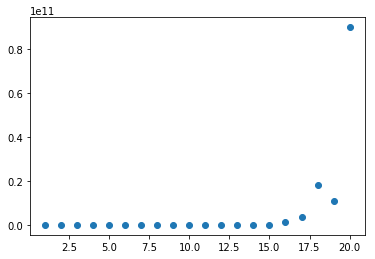

In [0]:
x = np.arange(1,21)
y =  (5 * x) + 12 + (np.random.randn(20)*3)

y = 1.25**y

plt.scatter(x,y)

Is there a linear a pattern to this data? We could try fitting a linear regression, but just eyeballing it tells us this would probably be a bad fit. Instead we first should bring the data into a more workable range. Notice the scales on the data are huge. 

Let's actually look at the values contained in $y$:

In [0]:
print(y)

[6.81825783e+01 6.04504026e+01 1.44171404e+03 3.01918952e+03
 2.88947130e+03 9.85696822e+03 1.18927958e+05 7.30284475e+04
 2.24154410e+05 1.95779455e+06 5.96608650e+06 5.51980229e+06
 1.53933317e+07 8.36436156e+07 1.57571346e+08 1.38027866e+09
 3.72782270e+09 1.81674335e+10 1.09948348e+10 8.98860405e+10]


Let's try applying a log to transform the large axis into something more reasonable:

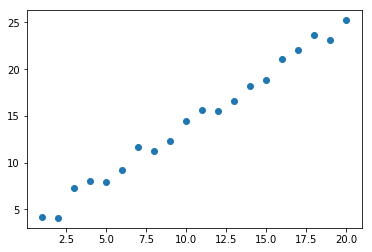

In [0]:
log_y = np.log(y)

plt.scatter(x,log_y)

This looks a lot more reasonable. There is clearly a linear relation between the two variables, we just had to visualize it in a different space. In general if you have data spread sparsely over a wide range it could be worth attempting a log transform. 

Some forms of data tend to require log transforms, but this is something where expert knowledge will guide your choices.

In retail settings we often see very cheap items (or free samples) have a ton of purchases. But as we increase the price this quickly drops off. The following plot of price vs number of purchases is fairly typical:

array([4.98681072e+01, 8.01604896e+00, 2.58456150e+00, 3.59422783e-01,
       1.95430328e-01, 1.12309835e-01, 4.30427938e-02, 3.93228893e-03,
       6.53847680e-03, 1.52309573e-03, 5.94900911e-04, 1.37749064e-04,
       2.28146757e-05, 9.63555712e-06, 8.12909860e-06, 4.03088043e-06,
       3.65885205e-07, 1.15607435e-07, 2.18105506e-08, 2.34783175e-08])

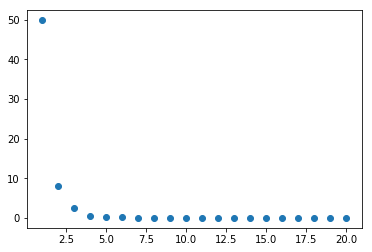

In [0]:
x = np.arange(1,21)
y =  (5 * x) + 12 + (np.random.randn(20)*3)

y = 1000*(1 / (1.25**y))

plt.scatter(x,y)
y

Fitting a linear model to this would be pointless, look how quickly the purchase rate drops off, it's exponential in its decay. If we instead plot the log of the data:

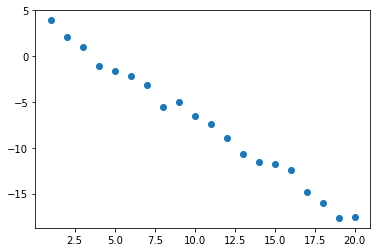

In [0]:
log_y = np.log(y)

plt.scatter(x,log_y)

Often it's the case if our data, look like they follow an exponential grown our decay then we can apply a log transform to get our data back into some workable range.

### MaxMin Scaler

When dealing with multiple features we often need to ensure they lie within a comparable range. For example consider the cancer dataset:

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
data.shape

(569, 30)

There are thirty features, and many of them are on totally different scales. If we look at the range of values the following feature takes on across all 569 data points we get:

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


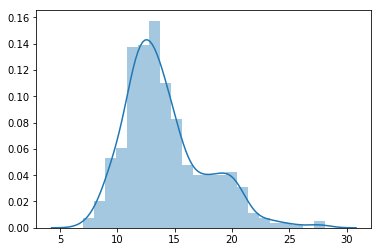

In [0]:
x_one=data[:,0]
sns.distplot(x_one);

While the range of values for another feature looks like:

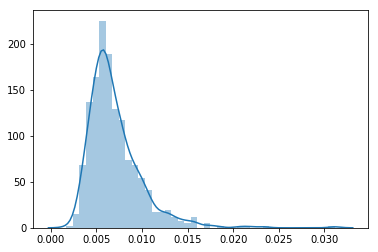

In [0]:
x_two=data[:,14]
sns.distplot(x_two);

Plotting them together we get:

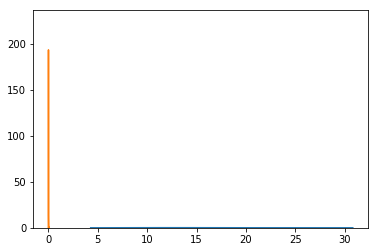

In [0]:
sns.distplot(x_one);
sns.distplot(x_two);

The feature scales are totally different, one is 1000 times higher than the other! Any model that relies on features being in a similar range would be totally thrown. Thus an important part of preprocessing is scaling the data to look similar. Here we transform each feature so that they lie on a similar range of values. Tools which transform data are into these more reasonable ranges are called scalers.

Conceptually the simplest scaler is the `MinMaxScaler` found in `preprocessing`. This will transform a feature so that the values lie between $0$ and $1$. if $v$ is the value of a particular feature $x$ then we transform it by applying:

$$v^{new} = \frac{v^{old}-min(x)}{max(x)-min(x)}$$

We fit the scaler to the training data and apply the transformation:

In [0]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data_min_max = scaler.transform(data)

If we plot each feature we now see they lie on the same scale.

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


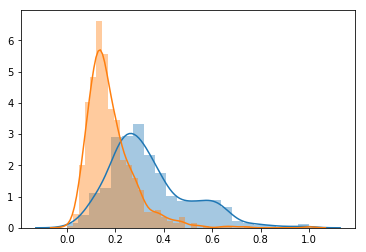

In [0]:
x_one_scaled = data_min_max[:,0]
x_two_scaled = data_min_max[:,14]

sns.distplot(x_one_scaled);
sns.distplot(x_two_scaled);

This scaler has just shrunk (or expanded) each feature so that the overall shape is preserved, but the range of values lies between 0 and 1. 

Does this mean we should just apply this transformation to each feature? Not quite. There are a few drawbacks to the method, and its not guaranteed to help classification. A much more common transformation found in machine learning is the standard transform.  

### Standard Scaler

While the previous scaler compressed data into a comparable range it didn't impact the underlying shape of the data. The standard scaler actually changes the underlying shape of the feature distribution. First it removes the mean of each feature, this pushes each feature to be centred around 0. It then divides by the variance of each feature. This ensures the variance of each feature, taken over the individual data points, is 1. Formally:

$$v^{new} = \frac{v^{old}-\mu(x)}{\sigma(x)}$$


Many models we see are built on the assumption the data is centred at 0 and has unit variance for each feature. It can often help to apply a standard scaler to your data. That being said it's not always of use, and sometimes it can hurt performance.

Implementing the standard scaler is the same as the previous. If we wanted to scale the cancer data we would just run the following script:

In [0]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)
standard_data = scaler.transform(data)

Now we can plot the scaled features together (recall they were totally off before):

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


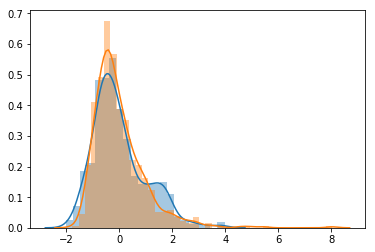

In [0]:
x_one_scaled = standard_data[:,0]
x_two_scaled = standard_data[:,14]

sns.distplot(x_one_scaled);
sns.distplot(x_two_scaled);

Notice the values are no longer bounded between $[0,1]$, they even stretch into the negative range. Furthermore, the distributions now almost lie one top of each other, if you look back at the previous method they were disjoint.

Let's actually visualize what this scaler is doing with two features. Consider the following dataset:

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


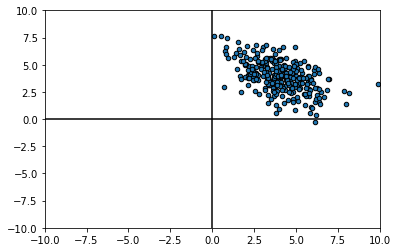

In [0]:
#Generate some data
points_per_class = 300

mean = [4,4]
cov = [[1,-2],[-2,1]]
x = np.random.multivariate_normal(mean, cov, (points_per_class))
y = np.full((points_per_class),0)

#Plot
fig, ax = plt.subplots()

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(x[:, 0], x[:, 1], s=20, edgecolor='k')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.show()

It's got a bit of a skew to it and it's in the upper right quadrant of the grid. If we also apply a standard scaler and visualize the results:

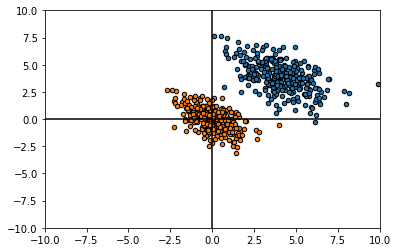

In [0]:
#Transform
scaler = preprocessing.StandardScaler()
scaler.fit(x)
standard_x = scaler.transform(x)

#Plot
fig, ax = plt.subplots()

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(x[:, 0], x[:, 1], s=20, edgecolor='k')
plt.scatter(standard_x[:, 0], standard_x[:, 1], s=20, edgecolor='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.show()

We see the vertical feature has been squashed a bit. Each individual feature now has a normalized variance, but the overall diagonal skew remains.

Scaling does not just squish the data, it can also expand it outwards, consider the following example:

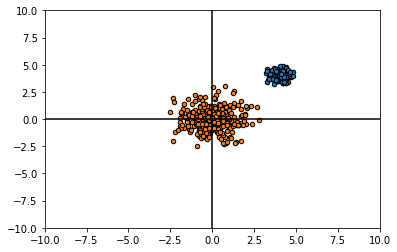

In [0]:
mean = [4,4]
cov = [[1/10,0],[0,1/10]]
x = np.random.multivariate_normal(mean, cov, (points_per_class))

#Transform
scaler = preprocessing.StandardScaler()
scaler.fit(x)
standard_x = scaler.transform(x)

#Plot
fig, ax = plt.subplots()

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(x[:, 0], x[:, 1], s=20, edgecolor='k')
plt.scatter(standard_x[:, 0], standard_x[:, 1], s=20, edgecolor='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.show()

### Should I Scale my Data?

This is actually somewhat controversial. There are pros and cons to scaling the data:

1. Many models based on distance (we will see these in future lectures) rely on data lying in a similar range. 
2. Many optimization techniques tend to work well with scaled data (we will talk more about this in the advanced week)
3. When we scale our data we are removing some interpretability from our models. Let's say we are fitting a linear regression from $X$ to $y$. If we did not scale we could say a feature weight of $\beta_i$ means an increase in $x_i$ of one unit corresponded to an increase in our prediction by $\beta_i$. If we scale our data then this interpretation is now more complex, each feature went through a transformation.

In machine learning more often than not people tend to scale their data, even if it's not necessary or correct. In reality this is a judgment call, you need to ask what do you need out of your model. You also need to ask what do the underlying features represent.  

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


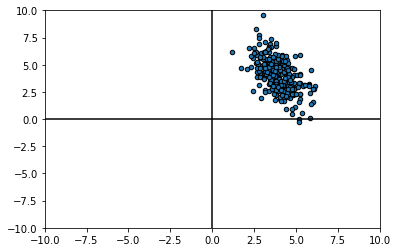

In [0]:
#Generate some data
points_per_class = 300

mean = [4,4]
cov = [[1,-2],[0,1]]
x = np.random.multivariate_normal(mean, cov, (points_per_class))
y = np.full((points_per_class),0)

#Plot
fig, ax = plt.subplots()

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(x[:, 0], x[:, 1], s=20, edgecolor='k')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.show()

---
#### Exercise 1:

1. For the 2D data we transformed with the standard scaler repeat the transformation. But this time use the MaxMin scaler. What does this plot look like? How does it compare to the standerd scaler plot? Try plotting out some of the other scalers that Scikit-Learn provides.
2. Using the cancer data set fit a logistic regression model, evaluate the model. Repeat the exercise with the scaled data, try various scalers. What about using a train/test split (50/50). How do you scale the data? Do you scale the train set and test set separately? Do you fit a scaler to each of them? Do you use the train set scaler on the test set? Which of these seems the most reasonable to you?
---

### Scale and Regularization



Regressions, logistic and linear, are somewhat immune to changes in data scale. If the range of values for some feature is shrunk down then a model can compensate by having smaller weights, in this case performance will not be impacted. But this is not always the case.

Let's actually look at an example where scale impacts the accuracy of our models. Recall in regularization we penalize models which learn to use heavy weight parameters. If the weights we learn in regression must be adjusted for data scale then this can have an impact on model performance.

First let's load up two (slightly modified) dimensions of the cancer dataset:

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

#x = np.stack([x[:,0], x[:,14]],axis=0).T
x = np.stack([x[:,0], x[:,14]],axis=1)


Let's fit a logistic regression to the data:

In [0]:
from sklearn.linear_model import LogisticRegression

my_logreg_model = LogisticRegression(C=0.01).fit(x,y)

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now let's do the same, but first we scale the data:

In [0]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x = np.stack([x[:,0], x[:,14]],axis=1)

scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

my_logreg_model_scaled = LogisticRegression(C=0.01).fit(x_scaled,y)

/Users/angelinapesevski/anaconda3/envs/advanced_bs_tfk/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now let's compare the accuracy of the two models:

In [0]:
print(my_logreg_model.score(x,y))
print(my_logreg_model_scaled.score(x_scaled,y))

0.648506151142355
0.8804920913884007


The model fitted to the scaled data did far better. Because of the wide range of values in the unscaled data our regularization really had an impact on the model fitting!

---
#### Exercise 2 :

1. Try fitting a logistic regression model to the wine data set from sklearn. Remember that LogisticRegression fits a regularized model by default. Try fitting models on scaled and non-scaled version of the data. Use a train/test split of 0.5. Do you see any difference in performance?

2. Repeat the previous exercise using a train test split of (70/30)
---

<div id="container" style="position:relative;">
<div style="position:absolute; float:right; left:45px">© BrainStation Inc. 2017 - 2019
This material and all course content is the proprietary intellectual property of BrainStation Inc. and may only <br/> be used by course participants or educators for educational purposes as authorized by BrainStation. Any other use is unauthorized and unlawful. </div>
<div style="float:left; width:35px"><img src= "https://drive.google.com/uc?export=view&id=1CanYUb53J1YjtFm-NPiNIKj3X9Rs61wu" /></div>
</div>